# Comparison error plot noteook
- plots L-curve for ROM and FEM methods
- also plots different hyper parameter graphs for available data (letters)
- h = 1/(mesh_stepsize) lam = reg (regularization param), tol = tolerance for the CG algo
- the data is generated in *Gen_Data_CSV* and stored in the Data directory

In [20]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('Utils/')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rc('xtick', labelsize=12)  
plt.rc('ytick', labelsize=16)
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
def plot_func(sz, xs, ys, islog = False, title = None,
              xlab = None, ylab = None, leg = None, scatter = False, 
              c = None):
    '''plots ys v. xs = [x1s, x2s, ...], ys = [y1, y2, ...]'''
    '''leg = [legend1, legend2, ...]'''
    plt.figure(figsize = sz)
    
    if islog:
        for y in ys:
            y_ = np.log10(y)
            if scatter:
                for x in xs:
                    x_ = np.log10(x)
                    if c != None:
                        plt.scatter(x_, y_, s = 50, c = c, alpha=0.5)
                    else:
                        plt.scatter(x_, y_, s = 50, alpha=0.5)
            else:
                for x in xs:
                    x_ = np.log10(x)
                    plt.plot(x_, y_, 'o-',linewidth = 2)
    else:
        for y in ys:
            if scatter:
                for x in xs:
                    if c != None:
                        plt.scatter(x, y, s = 50, c = c, alpha=0.5)
                    else:
                        plt.scatter(x, y, s = 50, alpha=0.5)
            else:
                for x in xs:
                    plt.pl(x, y, linewidth = 2)

    plt.xlabel(xlab, fontsize = 14)
    plt.ylabel(ylab, fontsize = 14)
    plt.legend(leg, loc=0, fontsize=16)
    plt.title(title, fontsize=18)
    

## L-curve
- plots the L2 norm v. L2 residual of the algorithm's output under certain h and tol
- the task is fixed by reconstructing the letter A here


In [120]:
def plot_Lcurve(h,tol):
    df = pd.read_csv('Data/0128new_Aall_32to256_df.csv')

    yf = np.array(df[(df['h']==h) & (df['tol']==tol)].nm_f)
    yr = np.array(df[(df['h']==h) & (df['tol']==tol)].nm_r)
    xf = np.array(df[(df['h']==h) & (df['tol']==tol)].res_f)
    xr = np.array(df[(df['h']==h) & (df['tol']==tol)].res_r)
    lam = np.array(df[(df['h']==h) & (df['tol']==tol)].lam)
    lam = [f'$\lambda:{l}$' for l in lam]
    legend = ['fem','rom']
    text = f'h = 1/{h}, tol = {tol}'
    data = [[[xf,yf],'ro-','fem'], [[xr,yr],'bo-','rom']]
    plot_2D(data,text,'log($L_2$ residual)','log($L_2$ norm)',
        axis_bounds=None,xscale='log',yscale='log',anno=lam)


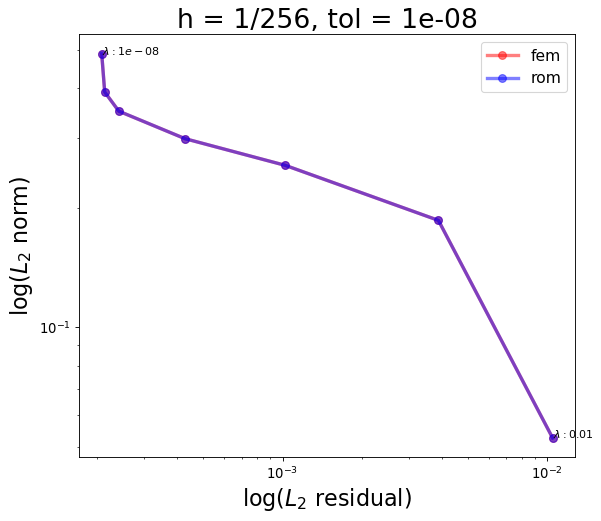

In [123]:
plot_Lcurve(256,1e-8)


In [12]:
#hyper parameters
hs = [2**5, 2**6, 2**7, 2**8] #32 to 256
lams = [1e-4,1e-5,1e-6,1e-7,1e-8]
tols = [1e-6,1e-7,1e-8,1e-9,1e-10]

## Fix h and lam
- plots the L2 error between FEM and ROM outputs v. tol

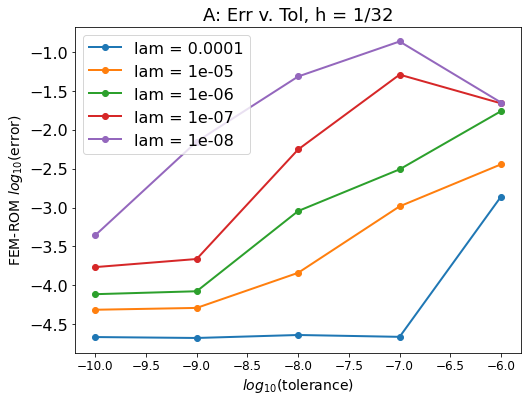

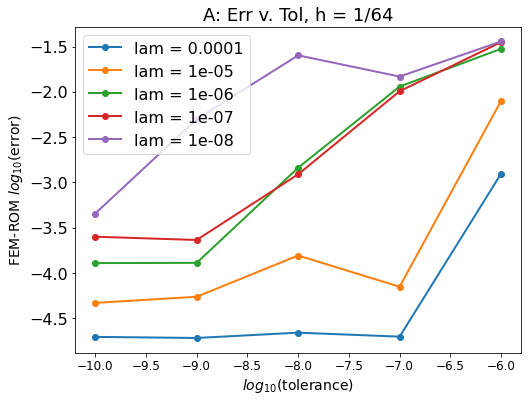

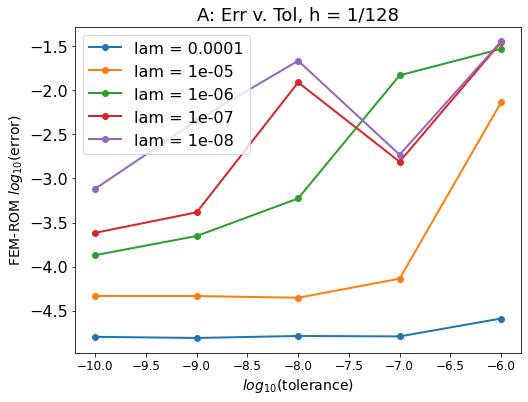

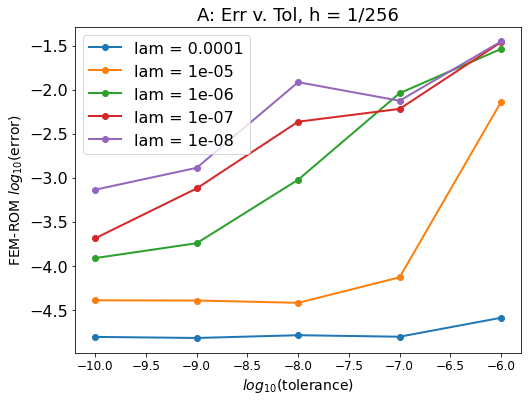

In [14]:
def plot1(letter):
    df = pd.read_csv('Data/cg_{}all_32to256_df.csv'.format(letter))
    for i in range(len(hs)):
        ys = []
        legend = []
        for j in range(len(lams)):
            ys.append(df[(df['h']==hs[i]) & (df['lam']==lams[j])].err_comp)
            legend.append('lam = {}'.format(lams[j]))
        x = tols
        text = '{}: Err v. Tol, h = 1/{}'.format(letter, hs[i])
        plot_func([8,6], [x], ys, islog = True, title = text,
                  xlab = '$log_{10}$(tolerance)', 
                  ylab = 'FEM-ROM $log_{10}$(error)', 
                  leg = legend, scatter = False, c = None)
plot1('A')

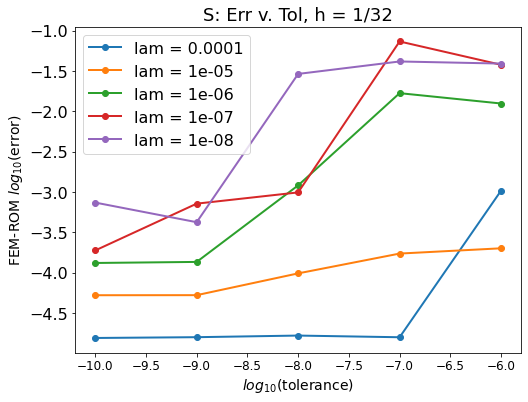

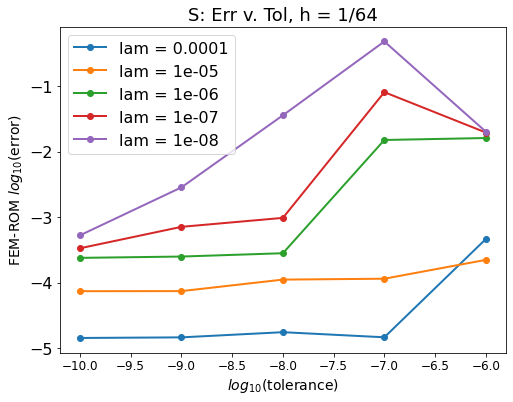

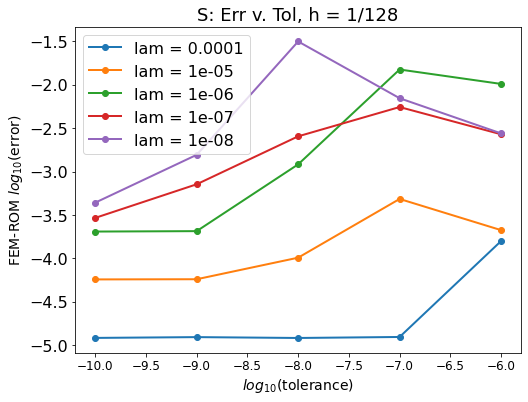

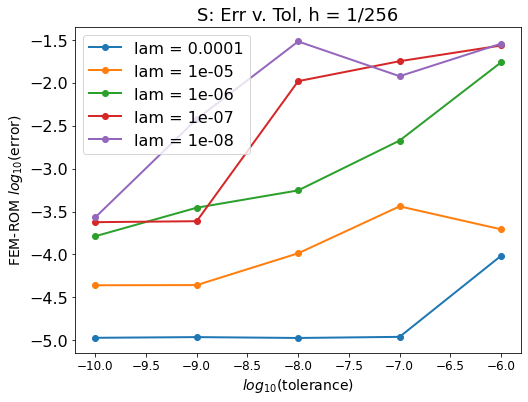

In [15]:
plot1('S')

## Fix h and tol
- plots the L2 error between FEM and ROM outputs v. lam
- You can select letters with corresponding data

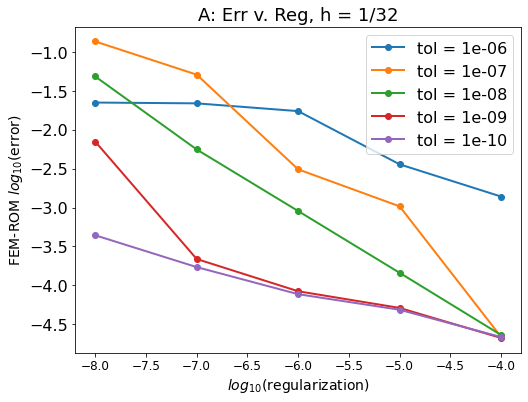

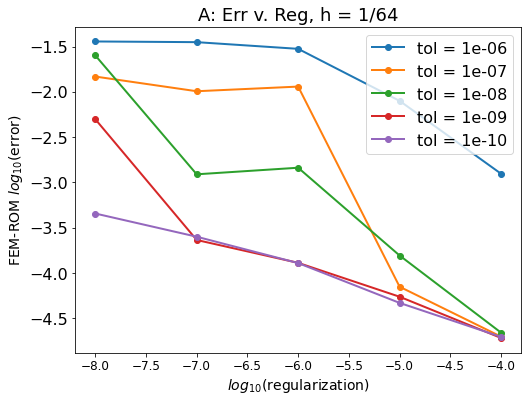

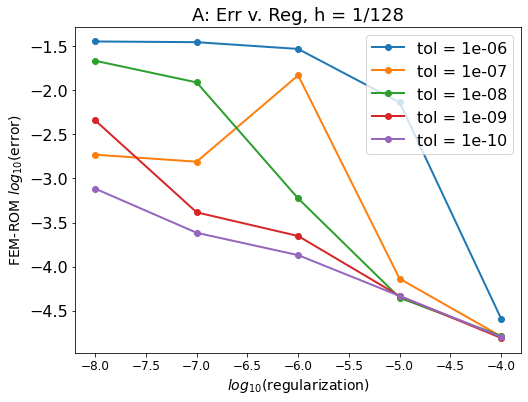

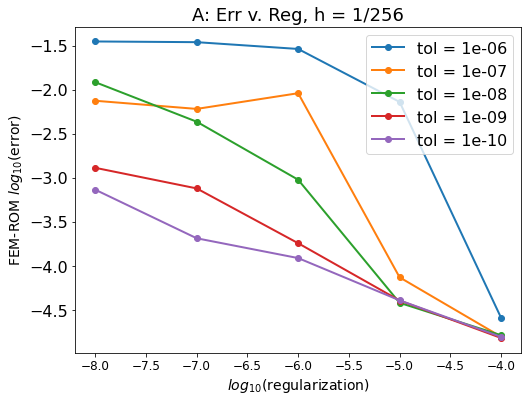

In [17]:
def plot2(letter):
    df = pd.read_csv('Data/cg_{}all_32to256_df.csv'.format(letter))
    for i in range(len(hs)):
        ys = []
        legend = []
        for j in range(len(tols)):
            ys.append(df[(df['h']==hs[i]) & (df['tol']==tols[j])].err_comp)
            legend.append('tol = {}'.format(tols[j]))
        x = lams
        text = '{}: Err v. Reg, h = 1/{}'.format(letter, hs[i])
        plot_func([8,6], [x], ys, islog = True, title = text,
                  xlab = '$log_{10}$(regularization)', 
                  ylab = 'FEM-ROM $log_{10}$(error)', 
                  leg = legend, scatter = False, c = None)

plot2('A')

## Fix lam and tol
- plots the L2 error between FEM and ROM outputs v. h
- You can select letters with corresponding data

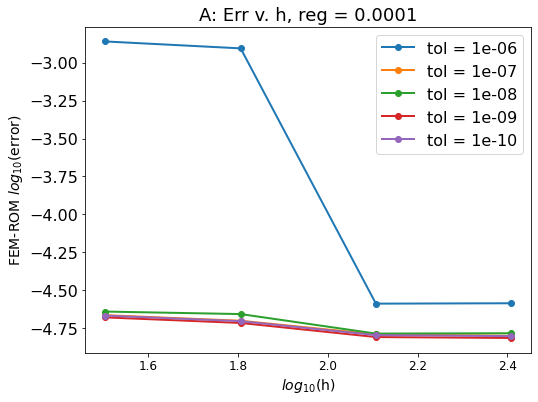

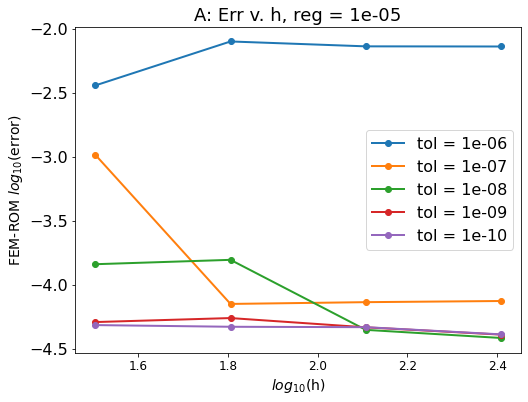

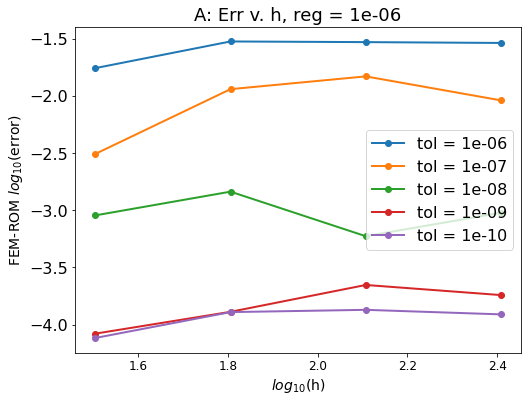

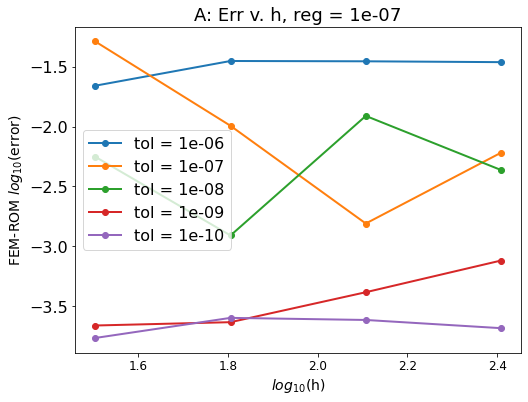

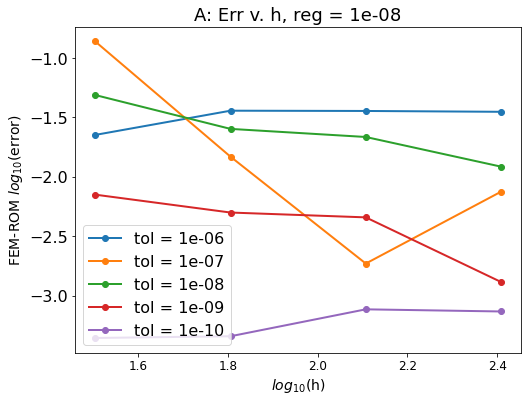

In [19]:
def plot3(letter):
    df = pd.read_csv('Data/cg_{}all_32to256_df.csv'.format(letter))
    for i in range(len(lams)):
        ys = []
        legend = []
        for j in range(len(tols)):
            ys.append(df[(df['lam']==lams[i]) & (df['tol']==tols[j])].err_comp)
            legend.append('tol = {}'.format(tols[j]))
        x = hs
        text = '{}: Err v. h, reg = {}'.format(letter, lams[i])
        plot_func([8,6], [x], ys, islog = True, title = text,
                  xlab = '$log_{10}$(h)', 
                  ylab = 'FEM-ROM $log_{10}$(error)', 
                  leg = legend, scatter = False, c = None)

plot3('A')